<a href="https://colab.research.google.com/github/NN2777/Phyton-Image-Processing/blob/main/Praktikum_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lena = cv.imread("/content/drive/MyDrive/koceng/lena.jpg")

rows, cols = (lena.shape[0], lena.shape[1])
R = [[0 for i in range(cols)] for j in range(rows)]
G = [[0 for i in range(cols)] for j in range(rows)]
B = [[0 for i in range(cols)] for j in range(rows)]

for y in range(lena.shape[0]):
  for x in range(lena.shape[1]):
    for c in range(lena.shape[2]):
      count (c);

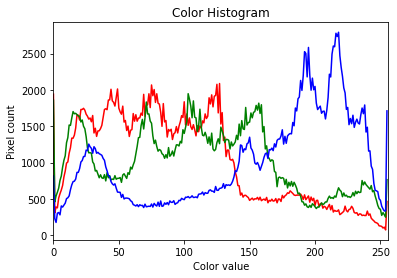

In [6]:
lena = cv.imread("/content/drive/MyDrive/koceng/lena.jpg")
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        lena[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

plt.show()